In [12]:
import tensorflow as tf
import pickle
from keras.preprocessing import image
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split
import cv2 as cv

In [13]:
pickle_in = open(os.path.abspath("../model_training_data/X.pickle"),"rb")
X = pickle.load(pickle_in)

pickle_in = open(os.path.abspath("../model_training_data/y.pickle"),"rb")
y = pickle.load(pickle_in)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
print(y_train.shape)

(8000, 1)


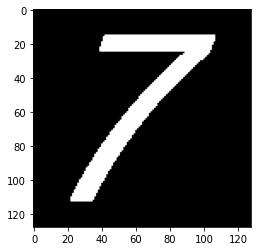

In [16]:
plt.figure()
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [17]:
IMG_SHAPE = X_train.shape[1:]

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=IMG_SHAPE))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=4, 
                    validation_data=(X_test,y_test))

Epoch 1/4
250/250 [==============================] - 40s 161ms/step - loss: 0.0227 - accuracy: 0.9931 - val_loss: 0.0151 - val_accuracy: 0.9960
Epoch 2/4
250/250 [==============================] - 41s 163ms/step - loss: 0.0101 - accuracy: 0.9969 - val_loss: 0.0193 - val_accuracy: 0.9930
Epoch 3/4
250/250 [==============================] - 42s 168ms/step - loss: 0.0075 - accuracy: 0.9975 - val_loss: 0.0147 - val_accuracy: 0.9955
Epoch 4/4
250/250 [==============================] - 43s 171ms/step - loss: 0.0078 - accuracy: 0.9984 - val_loss: 0.0048 - val_accuracy: 0.9985


In [21]:
test_image = cv.imread("Box.png")
gray = cv.cvtColor(test_image, cv.COLOR_RGB2GRAY)
ret, thresh = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)
test_image = np.expand_dims(thresh, axis=0)
np.argmax(model.predict(test_image))

4